In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

# Read the data

In [2]:
df = pd.read_csv("avocado.csv")

In [3]:
df.head(1)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany


# Check the data type

In [4]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

# Check if there's any Na and drop them

In [5]:
df.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

# Convert the date type

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

# Get the revenue

In [7]:
df['revenue'] = df['AveragePrice'] * df['Total Volume']

# Find which region has the highest revenue

In [24]:
pd.crosstab(index= df['region'],
           columns= df['type'],
           values= df['revenue'],
           aggfunc= 'mean',
           margins= True).\
round(2).\
sort_values(by='All', ascending=False).\
head(6)

type,conventional,organic,All
region,,,
TotalUS,36299028.44,1497380.44,18898204.44
California,6388388.94,247197.02,3317792.98
West,5986495.96,326129.22,3156312.59
Northeast,5420080.00,260439.96,2840259.98
SouthCentral,5032674.24,139274.22,2585974.23
Southeast,4068095.31,95399.26,2081747.28


# Convert the date to quarter period

In [9]:
df['quarter'] = df['Date'].dt.to_period('Q')

# Suppose we look into avocado's sales in California region

In [15]:
cal = df[df['region'] == "California"]
cal.head(1)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,revenue,quarter
312,0,2015-12-27,0.9,5040365.47,1833946.59,1760956.02,232755.85,1212707.01,1090140.07,110737.35,11829.59,conventional,2015,California,4536328.923,2015Q4


# Get the revenue info on both of the avocado's types in quarterly

In [26]:
cal1 = pd.crosstab(index= cal['quarter'],
           columns= cal['type'],
           values= cal['revenue'],
           aggfunc= 'mean',
           margins= True).\
round(2)

cal1

type,conventional,organic,All
quarter,,,
2015Q1,5775480.52,186550.70,2981015.61
2015Q2,6232256.07,192799.16,3212527.62
2015Q3,6207290.09,186178.25,3196734.17
2015Q4,4844614.00,150395.09,2497504.54
2016Q1,5834509.39,229660.20,3032084.79
2016Q2,6212590.30,291880.09,3252235.19
2016Q3,7062174.96,292260.87,3677217.92
2016Q4,5633479.40,229033.88,2931256.64
2017Q1,6417093.47,270775.36,3343934.42


# Visualize them

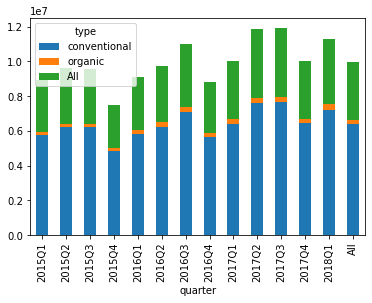

In [25]:
cal1.plot.bar(stacked=True, legend=True)

# See which are the most avocado's types and codes sold

In [33]:
cal['4046'].sum().round()

398967013.0

In [32]:
cal['4225'].sum().round()

351491402.0

In [31]:
cal['4770'].sum().round()

31841046.0

In [29]:
cal['Small Bags'].sum().round()

229097680.0

In [28]:
cal['Large Bags'].sum().round()

12311936.0

In [30]:
cal['XLarge Bags'].sum().round()

5272578.0

# Conclusion 

Our avocado sales for the last 3 years (2015 - 2018) has an interresting fluctuations which distributed to all across USA region.

> Say we have `marketing research problem`:
1. Which regions are sold the most avocados? 
2. which period our avocado's sales has the highest and lowest revenue in the top region?
3. How our consumer behavior gives impact?
4. What are the most favorable types of avocados sold?

**Answer**

1. Top 5 regions which sold sold the most avocado are:
 - California
 - West
 - North East
 - South East
 - South Central

2. California region
 - The data of avocado's sales in California shown that the revenue during 3 years is USD 3,317,792.98 (average)
 - The highest revenue reported in the period of third quarter in 2017 (USD 3,973,605.16 by average)
 - The lowest is the last quarter in 2015 (USD 2,497,504.54 by average)

3. Consumer behavior
 - People have discovered or at least strongly believe the avocados are a "superfood" and are considered very healthy and since healthy food is a big trend lately and avocados just happen to be one of the items that has a pretty mild taste that people enjoy.
 - The weather in the USA during the third quarter are Summer (July and August) and Fall (September) and generally avocado season in California is from Spring through Summer
 - These seasons attract both local and international tourists to visit the USA, because during Summer, Northern States enjoy warm-even hot-days and cooler mornings and nights, while Southern States and tropical areas experience very hot temperatures. In the Fall, temperatures begin to cool down around the country. 
 - These are the reason why the restaurants in the USA are selling so many avocado dishes.
 - Despite by the political reason which the most tangible explanation is that the rise of avocados in the USA comes on the heels of loosened import restrictions, which used to ban shipments of the fruit from Mexico. The restrictions were problematic, because Mexico still the world's largest producer.
 - On the other hand, during the last quarter, the USA season are Fall and Winter and the demands for avocado is in decline.
  - The avocado stocks might be finished during this quarter.
  - Most of Americans are more buying tangerine, kiwi, and other winter-reaped-fruit.
  
4. The code 4046 (The smallest typical size) is the most favorable size avocado that the consumer attracted to and consumers are most likely buying small bags as well.

# Suggestions

> `Management decision problem`:
1. How to generate the revenue?

**Answer**

 - During the reap season of avocado, we want to keep some and freeze them until the last quarter to put them on sale.
 - The water in avocados expands when frozen, so the fruit may loses its texture and get mushy after thawing, 
 - we sell the avocado in their peeled, seeded, wrapped form in the freezer bag.
 - Pitch the frozen avocados into the hospitality industries where they would need avocados the most during the low season of avocado.
 - Put the bundling package on medium and XL bags with the code 4225 and 4770 by discount 
